In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load_df = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data_to_load_df = pd.read_csv("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
#mouse_drug_data_df = pd.read_csv(mouse_drug_data_to_load_df)
#clinical_trial_df = pd.read_csv(clinical_trial_df)

# Combine the data into a single dataset
merge_table_df = pd.merge(clinical_trial_data_to_load_df, mouse_drug_data_to_load_df,how="left",on=["Mouse ID","Mouse ID"])


# Display the data table for preview

merge_table_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_df = merge_table_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
#avg_tumor_vol_df = merge_table_df['Tumor Volume (mm3)'].mean()

# Convert to DataFrame)'
tumor_response_df = pd.DataFrame(grouped_df)
tumor_response_df = tumor_response_df.reset_index()
# Preview DataFrame
tumor_response_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem_df = merge_table_df.groupby(["Drug", "Timepoint"])['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_sem_df).reset_index()
# Preview DataFrame

tumor_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
tumor_response_df = tumor_response_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
standard_dev_df = tumor_sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
# Preview that Reformatting worked
tumor_response_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
tumor_response_max = tumor_response_df.index.max()

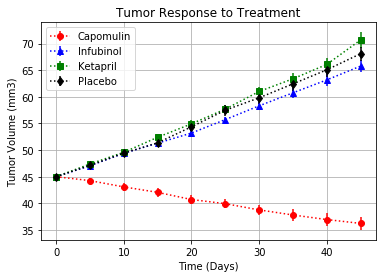

In [6]:
#Aesthetics

selected_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plotstylDict = {"Capomulin":'ro:', "Infubinol":'b^:', "Ketapril":'gs:', "Placebo":'kd:'}

# Generate the Plot (with Error Bars)
fig1, ax1 = plt.subplots()
for drug in selected_drugs:
    ax1.errorbar(tumor_response_df.index, tumor_response_df[drug], standard_dev_df[drug], fmt = plotstylDict[drug])


ax1.legend(plotstylDict)
plt.grid(True)
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
# Save the Figure
plt.savefig("TumorResponseToTreatment.png")

In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_2_df = merge_table_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
# Convert to DataFrame
avg_mes_df = pd.DataFrame(grouped_2_df)
# Preview DataFrame
avg_mes_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
Mes_sem_df = merge_table_df.groupby(["Drug", "Timepoint"])['Metastatic Sites'].sem()
# Convert to DataFrame
mes_sem_df = pd.DataFrame(Mes_sem_df).reset_index()
# Preview DataFrame
mes_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [20]:
# Minor Data Munging to Re-Format the Data Frames
Mes_sem_df2 = merge_table_df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean()
mes_sem_df2 = pd.DataFrame(Mes_sem_df2).reset_index()
rfmt_mes_sem_df = mes_sem_df2.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
standard_dev_2_df = mes_sem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
# Preview that Reformatting worked
rfmt_mes_sem_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [21]:
standard_dev_2_df
#rfmt_mes_sem_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


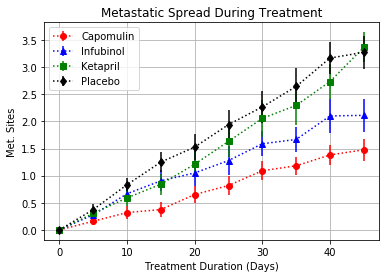

In [22]:
# Generate the Plot (with Error Bars)

selected_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plotstylDict = {"Capomulin":'ro:', "Infubinol":'b^:', "Ketapril":'gs:', "Placebo":'kd:'}

# Generate the Plot (with Error Bars)
fig2, ax2 = plt.subplots()
for drug in selected_drugs:
    ax2.errorbar(rfmt_mes_sem_df.index, rfmt_mes_sem_df[drug], standard_dev_2_df[drug], fmt = plotstylDict[drug])


ax2.legend(plotstylDict)
plt.grid(True)
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
# Save the Figure
plt.savefig("MetastaticSpreadDuringTreatment.png")



![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [23]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [24]:
grouped_3_df = merge_table_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']

survival_rate_df = pd.DataFrame(grouped_3_df).reset_index()

survival_rate_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [25]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [35]:
survival_rate_2_df = merge_table_df.groupby(['Drug', 'Timepoint'])['Mouse ID'].count()

survival_rate_2_df = pd.DataFrame(survival_rate_2_df).reset_index()

rfmt_survival_rate_2_df = survival_rate_2_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

rfmt_survival_rate_2_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


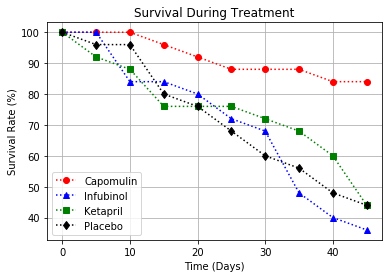

In [36]:
selected_drugs = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
plotstylDict = {"Capomulin":'ro:', "Infubinol":'b^:', "Ketapril":'gs:', "Placebo":'kd:'}

mouse_survival_df = pd.DataFrame()
for col in rfmt_survival_rate_2_df.columns:
    mouse_survival_df[col] = 100*rfmt_survival_rate_2_df[col]/25

fig3, ax3 = plt.subplots()
for drug in selected_drugs:
    plt.plot(mouse_survival_df.index, mouse_survival_df[drug], plotstylDict[drug])


ax3.legend(plotstylDict)
plt.grid(True)
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
# Save the Figure
plt.savefig("Survival During Treatment.png")

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)